## 서포트 벡터 머신
- 새로운 데이터가 입력되었을 때 기존 데이터를 활용해 분류하는 방법
- 패턴 인식, 자료 분석 등을 위한 지도 학습 모델로 회귀와 분류 문제 해결에 사용되는 알고리즘

## 🔹 주요 매개변수 (Parameters: sklearn.svm.SVC)

- **C** : 규제 강도 (default=1.0)  
  - 크면 → 오차를 거의 허용하지 않음 (과적합 위험 ↑)  
  - 작으면 → 오차를 허용 (일반화 ↑)  

- **kernel** : 커널 함수 종류 (default="rbf")  
  - 실제 데이터는 선형으로 잘 안 나눠짐 → 커널 함수(Kernel Trick) 사용
  - 데이터를 고차원 공간으로 매핑하여 직선으로 구분 가능하게 함
  - `"linear"` : 선형 SVM  
  - `"poly"` : 다항식 커널  
  - `"rbf"` : 가우시안 RBF 커널 (가장 많이 사용)  
  - `"sigmoid"` : 시그모이드 함수 기반  

- **gamma** : 커널 계수 (RBF, poly, sigmoid에서 사용)  
  - 크면 → 경계가 복잡해짐 (과적합 위험 ↑)  
  - 작으면 → 경계가 부드러워짐 (일반화 ↑)  

- **degree** : 다항식 커널의 차수 (default=3)  
  - 다항식 커널은 입력 데이터를 다항식 형태로 변환해서 비선형 패턴을 학습할 수 있게 합니다.

- **probability** : 확률 출력 여부 (default=False)  
  - True이면 `predict_proba()` 사용 가능 (학습 속도 느려짐)  

---

## 🔹 주요 속성 (Attributes)

- **support_** : 서포트 벡터의 인덱스  
  - 전체 학습 데이터 중에서 경계선에 딱 붙어서 경계를 만드는 점들의 번호
- **support_vectors_** : 실제 서포트 벡터 데이터  
  - support_가 번호라면, 이건 그 번호에 해당하는 실제 데이터
- **n_support_** : 클래스별 서포트 벡터 개수  
  - 클래스(라벨)별로 몇 개의 데이터가 서포트 벡터인지 숫자
- **coef_** : 결정 경계의 계수 (linear 커널일 때만 제공)  
- **intercept_** : 결정 경계의 절편  

---

## 🔹 주요 메서드 (Methods)

- **fit(X, y)** : 모델 학습  
- **predict(X)** : 예측 (클래스 레이블 반환)  
- **predict_proba(X)** : 예측 확률 반환 (`probability=True`일 때 가능)  
- **decision_function(X)** : 결정 함수 값 (margin과의 거리)  
- **score(X, y)** : 정확도 평가  

In [1]:
## 서포트 벡터 방식으로 분류 분석
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
c = pd.read_csv("./data/classification.csv")
c

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0


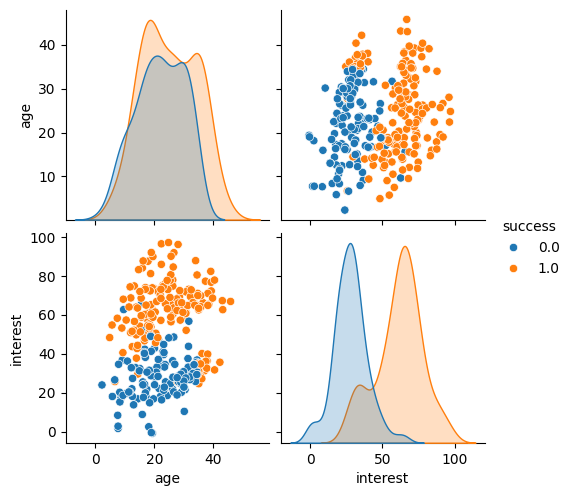

In [3]:
## 데이터 클래스 분포를 그래프로 확인
sns.pairplot(hue='success', data=c)

In [4]:
## 데이터의 분할
from sklearn.model_selection import train_test_split

x = c[['age', 'interest']]
y= c['success']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


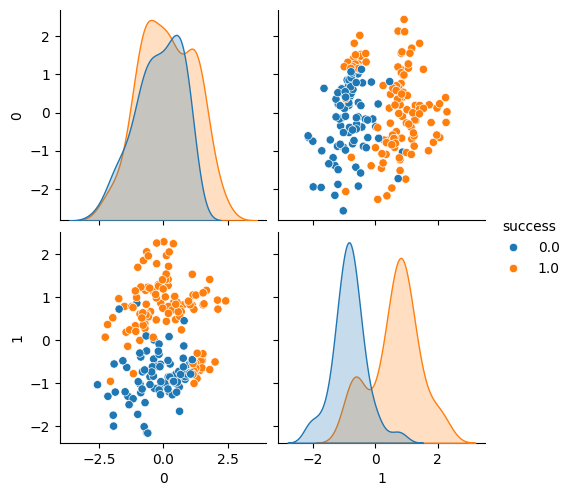

In [5]:
## SVM은 특성의 스케일에 민감하기 때문에 StandardScaler를 사용하면 좀 더 예측력이 높은 결정 결계를 생성
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

sns.pairplot(hue='success', data = pd.concat([pd.DataFrame(x_train), y_train.reset_index(drop=True)], axis=1))

In [6]:
## SVC로 모델을 만들고 데이터 적합
from sklearn.svm import SVC

clf = SVC(C=0.5)
clf.fit(x_train, y_train)

,C,0.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
## 테스트 모델로 모델 평가를 수행
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

x_test_scal = scaler.transform(x_test)
pred = clf.predict(x_test_scal)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도 ', round(test_acc*100, 2))
print('정밀도 ', round(test_prc*100, 2))
print('재현율 ', round(test_rcll*100, 2))
print('F1 ', round(test_f1*100, 2))

[[37  2]
 [ 2 49]]
정확도  95.56
정밀도  96.08
재현율  96.08
F1  96.08


In [8]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

| 항목        | SVC(kernel='linear')            | LinearSVC          |
| --------- | ------------------------------- | ------------------ |
| 라이브러리     | libsvm                          | liblinear          |
| 커널 지원     | 모든 커널 (linear 포함)               | ❌ (오직 선형만)         |
| 최적화 방식    | QP 기반 (이차계획법)                   | 좌표 하강법(CD)         |
| 대규모 데이터   | 느림                              | 빠름                 |
| 서포트 벡터 정보 | 제공 (support_, support_vectors_) | ❌ 미제공              |
| 사용 추천     | 작은 데이터, 고정밀 필요                  | 큰 데이터, 희소 데이터(텍스트) |


119
118


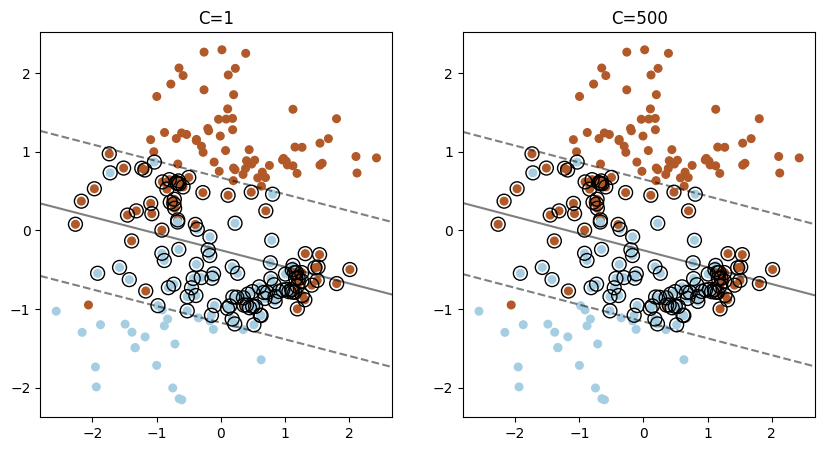

In [17]:
## 하이퍼파라미터 C에 따라 마진에서 어떠한 변화가 발생하는지 확인
## C 가 커지면 마진과 옳지 않은 데이터의 허용치가 증가

plt.figure(figsize=(10, 5))   # 전체 그래프 크기를 (가로 10, 세로 5)로 설정

# C 값 1과 500 두 가지 경우 비교
for i, C in enumerate([1, 500]):
    # 선형 SVM 학습 (C는 규제 강도, random_state=42는 재현성)
    clf = LinearSVC(C=C, random_state=42).fit(x_train, y_train)
    
    # decision_function 값 계산 (샘플이 경계선에서 얼마나 떨어져 있는지)
    decision_function = clf.decision_function(x_train)
    
    # margin(-1 ≤ f(x) ≤ +1) 근처에 있는 점들을 support vector로 간주
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = x_train[support_vector_indices]  # 해당 점들의 실제 좌표
    print(len(support_vectors[:, 0]))

    # 1행 2열 subplot 중 i+1번째 위치에 그림 (왼쪽: C=1, 오른쪽: C=500)
    plt.subplot(1, 2, i+1)
    
    # 학습 데이터 산점도 (클래스에 따라 색상 다르게 표시)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    
    # 현재 좌표축(Axes) 가져오기 → 이후 x/y 범위 확인에 사용
    ax = plt.gca()
    xlim = ax.get_xlim()   # x축 범위
    ylim = ax.get_ylim()   # y축 범위

    # 격자(grid) 생성 (결정 경계를 그릴 때 사용)
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50),   # x축 범위 내 50개 점
        np.linspace(ylim[0], ylim[1], 50)    # y축 범위 내 50개 점
    )

    # 각 격자점에 대해 decision function 값 계산
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)  # 격자 모양에 맞게 reshape

    # 등고선(contour)으로 결정 경계와 margin 그리기
    # levels=[-1,0,1] → -1(음성 margin), 0(경계선), +1(양성 margin)
    # linestyle=['--','-','--'] → margin은 점선, 경계선은 실선
    plt.contour(xx, yy, z, colors='k', levels=[-1, 0, 1],
                alpha=0.5, linestyles=['--', '-', '--'])

    # margin 위에 있는 support vector 점들을 동그라미로 표시
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                s=100, linewidth=1, facecolors='none', edgecolors='k')

    # 제목으로 현재 C 값 표시
    plt.title('C='+str(C))

# 최종 그래프 출력
plt.show()

In [10]:
## C가 1일때보다 C가 500일 때 마진과 반대 방향인 데이터가 더 많이 허용된다.

In [20]:
## 서포트 벡터 방식 회귀 분석
x = np.sort(5 * np.random.rand(40, 1), axis=0)

y = np.sin(x).ravel()

print(x[0:6], y[0:10])

[[0.05757152]
 [0.09619038]
 [0.15550021]
 [0.21898401]
 [0.25809823]
 [0.2595074 ]] [0.05753972 0.09604211 0.15487429 0.21723801 0.25524224 0.25660448
 0.46359892 0.52883648 0.54975835 0.77113557]


In [21]:
## 타깃데이터에 노이즈 추가
y[::5] += 3*(0.5-np.random.rand(8))
print(y[0:10])

[ 0.3053884   0.09604211  0.15487429  0.21723801  0.25524224 -0.60954933
  0.46359892  0.52883648  0.54975835  0.77113557]


# 📌 SVR (Support Vector Regression)

## 1. 정의
- SVM(Support Vector Machine)의 회귀(Regression) 버전
- 아이디어:
  - **ε-튜브(epsilon-tube)** 안에 들어오는 데이터는 오차로 보지 않음
  - ε-튜브 밖에 있는 데이터만 손실(패널티)을 부과하여 학습
- 장점: 작은 노이즈 무시 → 일반화 성능 좋음

---

## 2. 최적화 문제 (개념)
목적함수:
\[
\min_{w,b,\xi,\xi^*} \; \frac{1}{2}\|w\|^2 + C \sum_i (\xi_i + \xi_i^*)
\]

제약조건:
\[
\begin{cases}
y_i - (w \cdot x_i + b) \leq \epsilon + \xi_i \\
(w \cdot x_i + b) - y_i \leq \epsilon + \xi_i^* \\
\xi_i, \xi_i^* \geq 0
\end{cases}
\]

- **ε (epsilon)**: 무시할 오차 범위
- **ξ, ξ\***: ε 바깥으로 벗어난 정도 (슬랙 변수)

---

## 3. 주요 매개변수 (Parameters)
- **kernel**: 커널 종류 (`'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`)
  - ✅ Linear 커널
    - **수식**: \( K(x, x') = x \cdot x' \)
    - **사용 파라미터**: `C` (SVR이면 `epsilon` 포함)
    - **언제**: 고차원 희소데이터(텍스트), 거의 선형 분리
    - **장점**: 빠름, 해석 용이(선형 계수)
    - **주의**: 비선형 패턴엔 한계

  - ✅ RBF(Gaussian) 커널
    - **수식**: \( K(x, x') = \exp(-\gamma \|x - x'\|^2) \)
    - **사용 파라미터**: `C`, `gamma` (SVR이면 `epsilon`도)
    - **언제**: 일반적인 비선형 데이터(기본 선택지)
    - **장점**: 범용, 성능 우수
    - **튜닝 팁**: `C`와 `gamma`를 함께 그리드/베이지안 탐색  
      예: `C ∈ {0.1,1,10,100}`, `gamma ∈ {1e-3, 1e-2, 1e-1, 1}`

  - ✅ Polynomial(다항) 커널
    - **수식**: \( K(x, x') = (x \cdot x' + \text{coef0})^{\text{degree}} \)
    - **사용 파라미터**: `C`, `degree`, `gamma`, `coef0` (SVR이면 `epsilon`)
    - **파라미터 의미**
      - `degree`: 차수(보통 2~5); 클수록 복잡, 과적합 위험
      - `coef0`: 상수항; 낮으면 원점 중심, 높이면 상수 영향↑
      - `gamma`: 항의 스케일 조절
    - **언제**: 다항적 경계가 자연스러운 데이터
    - **주의**: 파라미터 많아 튜닝 난이도↑, 계산량↑

  - ✅ Sigmoid 커널
    - **수식**: \( K(x, x') = \tanh(\alpha \, x \cdot x' + \text{coef0}) \)
    - **사용 파라미터**: `C`, `gamma`(=α), `coef0` (SVR이면 `epsilon`)
    - **언제**: 특수 케이스/연구용(신경망 유사)
    - **주의**: 실무 성능이 RBF보다 낮은 경우가 많음

- **C**: 규제 파라미터 (크면 오차 최소화, 작으면 일반화)
- **epsilon (ε)**: 오차 허용 폭
- **gamma**: RBF/Poly/Sigmoid 커널에서 사용 (데이터 간 영향 범위)

---

## 4. 주요 속성 (Attributes)
- **support_**: 서포트 벡터 인덱스
- **support_vectors_**: 실제 서포트 벡터 값
- **n_support_**: 서포트 벡터 개수
- **dual_coef_**: 쌍대 문제의 α 값들
- **coef_**: 선형 커널에서의 계수 벡터 (w)

---

## 5. 주요 메서드 (Methods)
- **fit(X, y)**: 학습 수행
- **predict(X)**: 새로운 데이터 예측
- **score(X, y)**: 결정계수 R² 반환
- **get_params() / set_params()**: 하이퍼파라미터 확인/설정

---

In [22]:
## 회귀 모델 적합 (랜덤포레스트, 선형회귀, 다항회귀)
from sklearn.svm import SVR

svr_rbf = SVR(kernel = 'rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1)

svr_rbf.fit(x, y)
svr_lin.fit(x, y)
svr_poly.fit(x, y)

,kernel,'poly'
,degree,3
,gamma,'auto'
,coef0,1
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [24]:
## 예측값 생성
rbf_pred = svr_rbf.predict(x)
lin_pred = svr_lin.predict(x)
poly_pred = svr_poly.predict(x)

## 성능평가 지표 확인
preds = [rbf_pred, lin_pred, poly_pred]
kernel = ['Radial Basis Function', 'Linear', 'Polynomial']
evls = ['mse', 'rmse', 'mae']

from sklearn.metrics import mean_squared_error, mean_absolute_error

results = pd.DataFrame(index = kernel, columns=evls)

for pred, nm in zip(preds, kernel):
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    rmse = np.sqrt(mse)

    results.loc[nm]['mse'] = round(mse, 2)
    results.loc[nm]['mae'] = round(mae, 2)
    results.loc[nm]['rmse'] = round(rmse, 2)

results


C:\Users\ekfla\AppData\Local\Temp\ipykernel_28196\1651199741.py:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc[nm]['mse'] = round(mse, 2)
C:\Users\ekfla\AppData\Local\Temp\ipykernel_28196\1651199741.py:21: FutureWarning: Chain

,mse,rmse,mae
Radial Basis Function,0.17,0.41,0.21
Linear,0.43,0.65,0.5
Polynomial,0.17,0.41,0.2
